# **Gradient Descent**  
[source](https://youtu.be/ORyfPJypKuU?list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH)  

An algorithm to find the minimum value of Loss Function going step by step. Can be used anywhere where loss function methodology is used. But here only focus is to study it on Linear Regression.
#### Famous Types
* Batch Gradient Descent
* Stochastic Gradient Descent
* Mini Batch Gradient Descent

## Intuition  
![ytss](assets/intuition.png)  
whats happening here is first as we know the equation of Loss function, we suppose that we already know the value of slop m, as taken in ss. so then the Loss function becomes only dependent on b. because only variable left in the formula is b, others are constant.  
**L depends on b^2**  
if we plot a line plot of this function. we would get a parabolic shape in the graph.  
Now here kicks in the difference with Oridinaly Least Squared (OLS) method. In OLS since we used close formulation (mathematical derivation to solve the problem), we just equal the who formual to 0. because at 0 we know that the values of m and b are minimum... but doing that had its draw back which we know (don't know? go to [MultiLinearRegression_Math](../../1_LinearRegression/2_MultipleLinearRegression/2_MLR_Math.ipynb) and look at second last cell.)  Becase of that draw back we come to Gradient Descent which doesn't rely on equaling the Loss function to 0.  

---

**How does GD reaches minumum values, if not my equaling it directly to 0?**  
![ytss](assets/GD_equation.png)  
<br>
For the sake of simplicity (getting things to 2D) we have taken m as already known. so now we have only b, and we have to reach its lowest value... 
Steps taken by GD to do that are:  
1. Take any random point on the parabolic shape (if dealing with linear regression which we are, because its function is squared)
2. Calculate its slope (how?: bottom right of ss, professionaly: derivative of loss function w.r.t b)
4. Put the value of slope into the equation: `b(new) = b(old) - (learning_rate)slope`. (learning rate is usually set to 0.01 to make the flow gradual.. otherwise drastic changes occur in the value of b(new). will learn in detail about learning rate later.)
5. If the resultant value is negative GD know to move to right side (where value of b increases) and if its positive then vice versa. moving oppsosite to sope.
6. When to stop?<br>
    * Repeats 4th step until the difference between b(new) and b(old) is very small. threshold mostly taken here is 0.0001, if the difference decreses below it or upto it.<br>
    *  Pre-decided number of iterations meaning we will take the final value of b where loop ended. these iterations are called epochs

## Mathematical Formulation:  
![tss](assets/math1.png)
Take random value,
calculate the slope using loss function equation... put the values, already have taken m as constant. put each upcoming value of b to calculate slope at that point of b.   
and then put it into the equation to find b(new).  
and then in next epoch, b(new) becomes b(old) and you keep going.

## Learning Rate  
How to decide whats the best learning rate to use? what should be the number of epochs? The answer to these questions relies very much on the dataset being used... almost everytime we have to check with different learning rates and epochs to find which one is leading us to minimum intercept (faster)
* take large learning rate and you would jump way off instead of minimizing.
* take too small and you epochs would end before you can reach the optimal point.
* Solution: Keep changing it bit by bit until you find best number.

## Universality of Gradient Descent  
Here we are studying it only through Linear Regression. but thats not the case, Every algorithm that uses loss function can be optimized using Gradient Descent which helps in finding the as good as possible parameters using the same formula `Var(new) = Var(old) - Lr(slope)`... only that thing that changes is the slope.


## Lets code now:

In [3]:
from sklearn.datasets import make_regression
import numpy as np

In [158]:
X,y = make_regression(n_samples = 4, n_features=1,random_state=13,n_targets=1,noise=80)

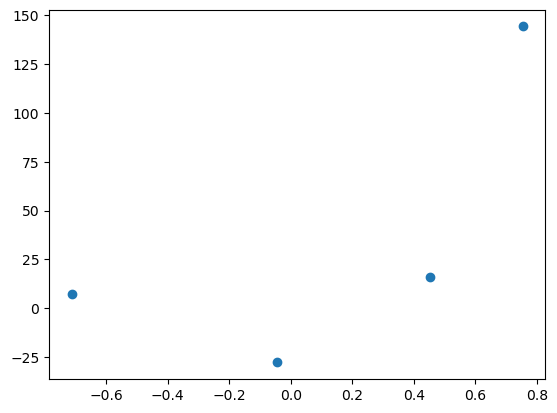

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [20]:
reg.coef_

array([78.35063668])

In [21]:
reg.intercept_

np.float64(26.15963284313262)

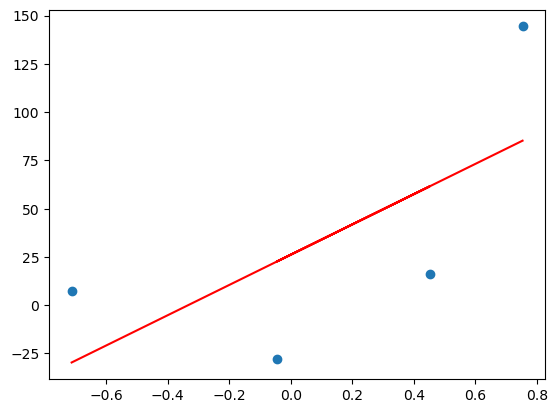

In [22]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [93]:
# applying gradient descent assuming m is constant at 78.35
# and lets assume starting value for b is 0
y_pred = ((78.35*X) + 0).reshape(4)
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

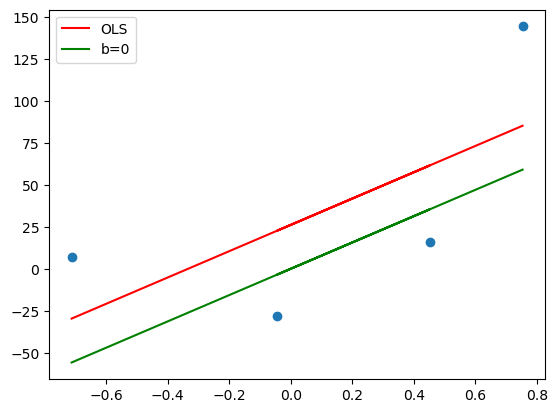

In [94]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label = 'OLS')
plt.plot(X,y_pred,color='green',label='b=0')
plt.legend()
plt.show()

In [135]:
m = 78.35
b = 0
# starting 

In [136]:
# putting values in the formula to find slope:
loss_slop = -2*np.sum(y - m*X.ravel() - b )
loss_slop


np.float64(-209.27763408209216)

In [137]:
# suppose learning rate is 0.1
lr = 0.1
step_size = loss_slop*lr
step_size

np.float64(-20.927763408209216)

In [138]:
b = b - step_size
b

np.float64(20.927763408209216)

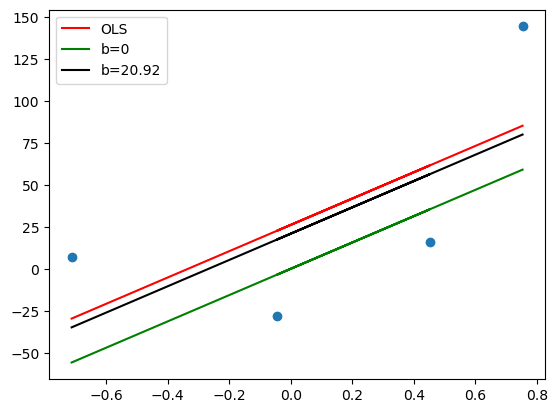

In [139]:
y_pred1 = (m*X+b).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label = 'OLS')
plt.plot(X,y_pred,color='green',label='b=0')
plt.plot(X,y_pred1,color='black',label='b=20.92')
plt.legend()
plt.show()

In [140]:
b

np.float64(20.927763408209216)

In [141]:
# iteration 2:
loss_slop = -2*np.sum(y - m*X.ravel() - b)
loss_slop

np.float64(-41.85552681641843)

In [142]:
lr=0.1
step_size = loss_slop*lr
step_size

np.float64(-4.185552681641844)

In [143]:
b = b - step_size
b

np.float64(25.11331608985106)

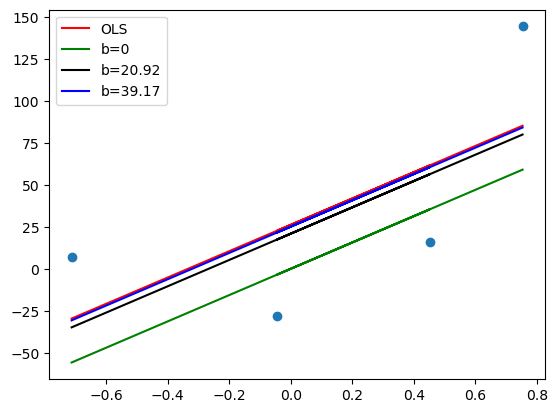

In [144]:
y_pred2 = (m*X+b).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label = 'OLS')
plt.plot(X,y_pred,color='green',label='b=0')
plt.plot(X,y_pred1,color='black',label='b=20.92')
plt.plot(X,y_pred2,color='blue',label='b=39.17')
plt.legend()
plt.show()

In [146]:
#iteration 3
loss_slop = -2*np.sum(y - m*X.ravel() - b)
loss_slop

np.float64(-8.371105363283675)

In [147]:
lr=0.1
step_size = loss_slop*lr
step_size

np.float64(-0.8371105363283675)

In [148]:
b = b - step_size
b

np.float64(25.95042662617943)

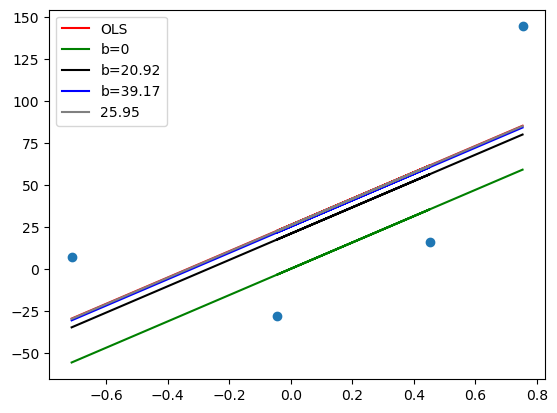

In [150]:
y_pred3 = (m*X+b).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label = 'OLS')
plt.plot(X,y_pred,color='green',label='b=0')
plt.plot(X,y_pred1,color='black',label='b=20.92')
plt.plot(X,y_pred2,color='blue',label='b=39.17')
plt.plot(X,y_pred3,color='grey',label='25.95')
plt.legend()
plt.show()

loss_slope: -6609.277634082092	 step size: -660.9277634082092	intercept: -139.07223659179078
loss_slope: -1321.8555268164184	 step size: -132.18555268164184	intercept: -6.886683910148946
loss_slope: -264.37110536328373	 step size: -26.437110536328376	intercept: 19.55042662617943
loss_slope: -52.874221072656724	 step size: -5.287422107265673	intercept: 24.837848733445103
loss_slope: -10.574844214531339	 step size: -1.057484421453134	intercept: 25.895333154898236
loss_slope: -2.114968842906279	 step size: -0.21149688429062793	intercept: 26.106830039188864
loss_slope: -0.42299376858125015	 step size: -0.042299376858125015	intercept: 26.14912941604699
loss_slope: -0.08459875371625003	 step size: -0.008459875371625004	intercept: 26.157589291418613
loss_slope: -0.01691975074325569	 step size: -0.0016919750743255692	intercept: 26.15928126649294
loss_slope: -0.0033839501486454537	 step size: -0.0003383950148645454	intercept: 26.159619661507804


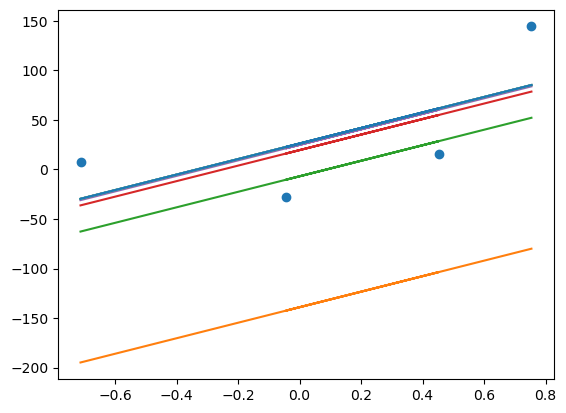

In [169]:
# lets wrap this in a loop
lr = 0.1
m = 78.35
b=-800
plt.plot(X,reg.predict(X))
epochs = 10
for i in range(epochs):
    loss_slop = -2 * np.sum( y - m*X.ravel() - b )
    step_size = loss_slop*lr
    b = b -  step_size
    print(f"loss_slope: {loss_slop}\t step size: {step_size}\tintercept: {b}")
    y_pred = m*X + b
    plt.plot(X,y_pred)
plt.scatter(X,y)

## When_it_will_not_work:
#### Non-Convex:
we are using Squared Mean Error (SME), to our favour it generates a convex function, **function which has only one minima: (goes in a U(2d) or bowl shape(3d))**. If the parameters are to be calculated from a non-convex function, there is a huge chance that we would end up on a local minima rather than a global one depending on the intial values of parameters. And for the perfect performance we need the parameters to be as smaller as possible meaning global  minima is necessary.
<br><br>
![ytss](assets/convex.png)
<br><br>
#### Saddle Point:
If the slope is almost straight, then the steps become too small and if the epochs are fewer there is a chance that we wont be able to get to the actual target place.  
#### Effect of data:  
If the features of data has too much difference in scaling... like one feature has values in 10s while next one got in lakhs. we have a problem... reaching at the lowest point in the slope will take more time then if the data is scaled.  
<br>
![ytss](assets/data_effect.png)